# loans regression

## read and preprocessing data set

In [57]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler

In [22]:
# read dataset with pandas

df = pd.read_csv('loans.csv')
df.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [23]:
# shape of data set and name columns

print(df.shape)
print(df.columns)

(443, 8)
Index(['client_id', 'loan_type', 'loan_amount', 'repaid', 'loan_id',
       'loan_start', 'loan_end', 'rate'],
      dtype='object')


In [24]:
# To continue the normalization and graphing process, and finally build the regression model,
# we don't need columns 'client_id' , 'loan_id' , 'loan_start' ,'loan_end'. we can remove them from the data set.

features_df = df.drop(['client_id' , 'loan_id' , 'loan_start' , 'loan_end'], axis=1)
features_df.head()

,loan_type,loan_amount,repaid,rate
0,home,13672,0,2.15
1,credit,9794,0,1.25
2,home,12734,1,0.68
3,cash,12518,1,1.24
4,credit,14049,1,3.13


In [25]:
# get general information about data set

features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   rate         443 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 14.0+ KB


In [27]:
# checking for the missing values

features_df.isnull().sum()

loan_type      0
loan_amount    0
repaid         0
rate           0
dtype: int64

In [28]:
# checking the data types of the columns

features_df.dtypes

loan_type       object
loan_amount      int64
repaid           int64
rate           float64
dtype: object

In [29]:
# the number of different values for the loan_type column

features_df['loan_type'].value_counts()

loan_type
home      121
cash      108
credit    107
other     107
Name: count, dtype: int64

In [31]:
# change loan_type to integer with labelencoder

change_loan_type = LabelEncoder()
features_df['loan_type'] = change_loan_type.fit_transform(features_df['loan_type'])
features_df['loan_type'] = features_df['loan_type'].astype(int)
print(features_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    int64  
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   rate         443 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 14.0 KB
None


In [32]:
features_df['loan_type'].value_counts()

loan_type
2    121
0    108
1    107
3    107
Name: count, dtype: int64

In [34]:
# Statistical description of the data set

features_df.describe()

,loan_type,loan_amount,repaid,rate
count,443.000000,443.000000,443.000000,443.000000
mean,1.512415,7982.311512,0.534989,3.217156
std,1.106012,4172.891992,0.499338,2.397168
min,0.000000,559.000000,0.000000,0.010000
25%,1.000000,4232.500000,0.000000,1.220000
50%,2.000000,8320.000000,1.000000,2.780000
75%,2.000000,11739.000000,1.000000,4.750000
max,3.000000,14971.000000,1.000000,12.620000


<Axes: xlabel='loan_type', ylabel='rate'>

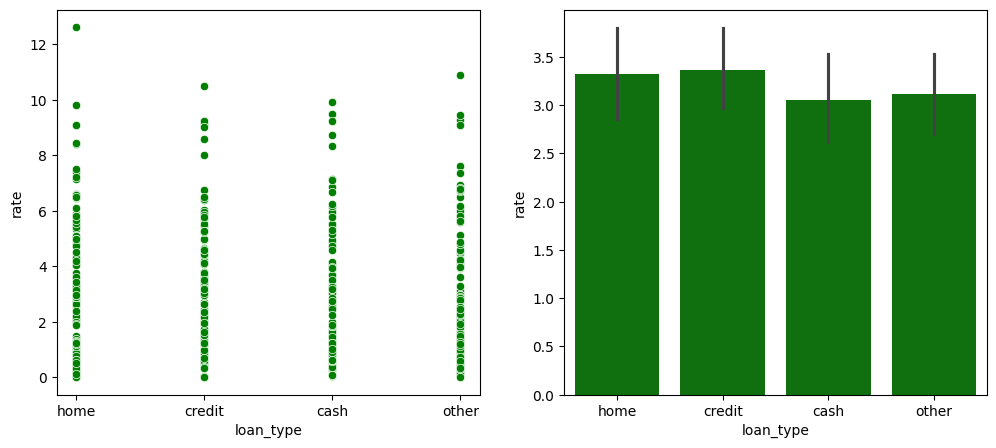

In [65]:
fig, ax = plt.subplots(1,2,figsize=(12, 5))

sns.scatterplot(x='loan_type' , y='rate' , data=features_df, color='green', ax=ax[0])
sns.barplot(x='loan_type' , y='rate' , data=features_df, color='green', ax=ax[1])


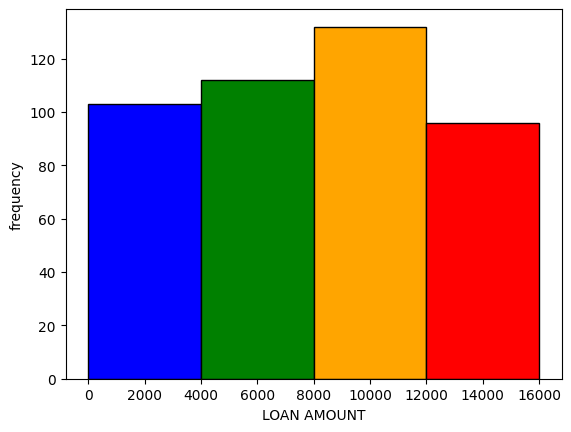

In [68]:
bins = [0,4000,8000,12000,16000]

colors = ['blue' , 'green' , 'orange' , 'red']

N,bins,patches = plt.hist(features_df.loan_amount , bins=bins , edgecolor='black')

for i in range(len(colors)):
    patches[i].set_facecolor(colors[i])
plt.xlabel("LOAN AMOUNT")
plt.ylabel("frequency")
plt.show()

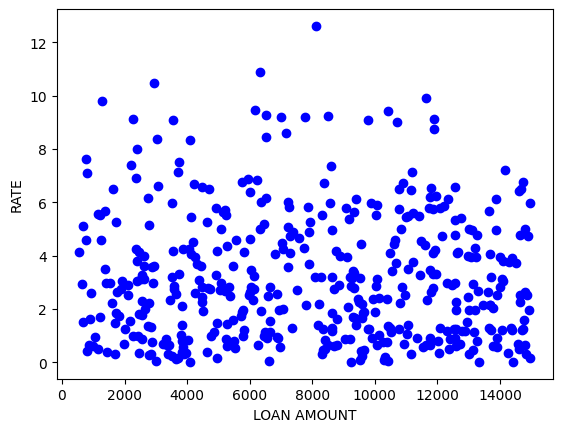

In [69]:
plt.scatter(features_df.loan_amount, features_df.rate,  color='blue')
plt.xlabel("LOAN AMOUNT")
plt.ylabel("RATE")
plt.show()

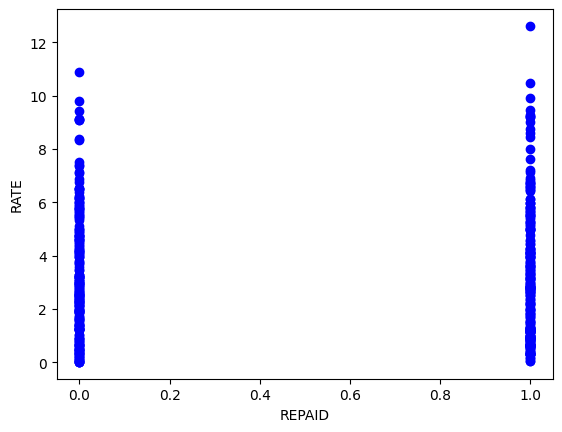

In [71]:
plt.scatter(features_df.repaid, features_df.rate,  color='r')
plt.xlabel("REPAID")
plt.ylabel("RATE")
plt.show()